In [1]:
%%html
<script src="https://kit.fontawesome.com/751ade44c1.js" crossorigin="anonymous"></script>

<style>
:root {
    --red: #d9534f;
    --yellow: #f0ad4e;
    --green: #5cb85c;
    --blue: #0275d8;
    --light-blue: #5bc0de;
    --dark-blue: #073b4c;
    --purple: #6A4C93;
}
    
.important {
    color: var(--yellow);
}

.optional {
    color: var(--green);
}
</style>


# <i class="fas fa-circle exercise"></i>Linear Algebra using Python and Numpy
<span class="badge badge-pill badge-warning">exercise</span> <span class="badge badge-pill badge-dark">notebook</span>


This exercise introduces basic linear algebra operations in Numpy as well as how to use it to solve systems of linear equations and for performing linear regression using least squares. Your goal should be to familiarise yourself with the theoretical linear algebra concepts and learn some standard applications in Numpy. We cover the following topics:

* Basic matrix operations (elementwise operations, transpose, multiplication, inverse)
* Properties of matrix multiplication and inversion
* Linear equations in matrix form
* Solving linear equations using matrix inverses


## Matrix operations and algebra
In this exercise you will learn to perform basic linear algebra operations using Numpy.


We define a few matrices to be used in the following exercises:


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
A = np.array([
    [1, 0.5, 1/3, 0.25],
    [0.5, 1/3, 0.25, 0.2],
    [1/3, 0.25, 0.2, 1/6],
    [0.25, 0.2, 1/6, 1/7]
])

B = np.array([
    [-16, 15, -14, 13],
    [-12, 11, -10, 9],
    [-8, 7, -6, 5],
    [-4, 3, -2, 1]
])

C = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/5, 1/7, 1/9],
    [1/4, 1/7, 1/8, 1/9],
])



### Task A):
1. Calculate $A-B$. Then convert each of $A$, $B$, to `np.float16` (use `np.float16(a)`) and try again. Do you observe any difference?


[[ 17.         -14.5         14.33333333 -12.75      ]
 [ 12.5        -10.66666667  10.25        -8.8       ]
 [  8.33333333  -6.75         6.2         -4.83333333]
 [  4.25        -2.8          2.16666667  -0.85714286]]
[[ 17.     -14.5     14.336  -12.75  ]
 [ 12.5    -10.664   10.25    -8.8   ]
 [  8.336   -6.75     6.2     -4.832 ]
 [  4.25    -2.8      2.166   -0.8574]]


2. Calculate $AC$ and $CA$ using `np.dot`. Are the results what you expected?


[[1.42361111 0.76904762 0.53720238 0.41481481]
 [0.8        0.43968254 0.31071429 0.24166667]
 [0.56666667 0.31380952 0.22301587 0.17407407]
 [0.44126984 0.24540816 0.175      0.13689153]]
[[1.42361111 0.8        0.56666667 0.44126984]
 [0.8        0.46361111 0.33333333 0.26190476]
 [0.50873016 0.29126984 0.20820106 0.16301587]
 [0.39087302 0.22609127 0.16256614 0.12777778]]


3. Calculate $A\cdot C$ using the `*` operator. Explain the difference between `np.dot` and `*`.


array([[1.        , 0.25      , 0.11111111, 0.0625    ],
       [0.25      , 0.11111111, 0.0625    , 0.04      ],
       [0.11111111, 0.05      , 0.02857143, 0.01851852],
       [0.0625    , 0.02857143, 0.02083333, 0.01587302]])

4. Calculate inverses of $A$ and $C$. Use `np.linalg.inv` to achieve this. ([docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html))


5. Calculate $AA^{-1}$. Is the result what you expected? Calculate $CC^{-1}$. How do they compare? *Note: You may want to use `np.around(a, dec)` ([docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html#numpy.around)) to round the results for easier visual inspection*.


[[ 1.  0.  0.  0.]
 [-0.  1.  0.  0.]
 [ 0. -0.  1. -0.]
 [-0.  0. -0.  1.]]
[[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [-0. -0.  1.  0.]
 [-0.  0.  0.  1.]]


### Task B)
The next tasks require two more matrices:


In [9]:
D = np.array([
    [2, 4, 5/2],
    [-3/4, 2, 0.25],
    [0.25, 0.5, 2]
])

E = np.array([
    [1, -0.5, 3/4],
    [3/2, 0.5, -2],
    [0.25, 1, 0.5]
])

D_inv = np.linalg.inv(D)
E_inv = np.linalg.inv(E)


1. Calculate $D^{-1}E^{-1}$, $(DE)^{-1}$, and $(ED)^{-1}$. Compare the results.


[[ 0.25261376  0.13578836 -0.51301587]
 [-0.08601058  0.11462434  0.18539683]
 [ 0.16592593 -0.18962963  0.17777778]]
[[ 0.21096296 -0.256      -0.1517037 ]
 [-0.15365079  0.20571429  0.56634921]
 [ 0.05367196 -0.28342857  0.12833862]]
[[ 0.25261376  0.13578836 -0.51301587]
 [-0.08601058  0.11462434  0.18539683]
 [ 0.16592593 -0.18962963  0.17777778]]


2. Calculate both $(D^{-1})^T$ and $(D^T)^{-1}$. Compare the results. *Note: The transpose of an array in Numpy is written as `a.T` where `a` is the name of the array variable.*


[[ 0.32804233  0.13227513 -0.07407407]
 [-0.57142857  0.28571429  0.        ]
 [-0.33862434 -0.2010582   0.59259259]]
[[ 0.32804233  0.13227513 -0.07407407]
 [-0.57142857  0.28571429 -0.        ]
 [-0.33862434 -0.2010582   0.59259259]]


## Linear equations


We now turn our attention to systems of linear equations. As explained during the lecture, matrices can represent systems of linear equations. In this view, a row $r_i$ of a matrix $A$ is the coefficients of one equation. The solutions are represented as a vector $\mathbf{b}$ where $b_i$ is the solution to equation $r_i$. The matrix-form of a linear equation system is then

$$
Ax=b
$$

and a solution can be found using

$$
\begin{align}
A^{-1}Ax&=A^{-1}b\\
x &= A^{-1}b.
\end{align}
$$

### Task C)
Solve each of the following equation systems by calculating $A^{-1}b$:

a)

$$ 
\begin{align}
2x + 3y  &= -1\\
x + y  &= 0\\
\end{align}
$$

b)

$$
\begin{align}
1x + 0y  &= 5\\
0x + 1y  &= 7\\
\end{align}
$$

c)

$$
\begin{align}
0x + y  &= -1\\
-2x + -3y  &= 2\\
\end{align}
$$

d)

$$
\begin{align}
x + -3y + 3z &= 0.5\\
x - 5y + 3z& = 0.5\\
6z + -6y + 4x &= 1.
\end{align}
$$

e)

$$
\begin{align}
2x + 3y + 4z &= 2\\
x + 4z + y &= -2\\
4z + 5y + 2x &= 3.
\end{align}
$$

f)

$$
\begin{align}
x + y + z &= 2\\
2x + 2z + 2y &= -2\\
3z + 3y + 3x &= 3.
\end{align}
$$


In [16]:
# Write solutions here


Solution a:  [ 1. -1.]
Solution b:  [5. 7.]
Solution c:  [ 0.5 -1. ]
Solution d:  [-5.55111512e-17  1.58603289e-17  1.66666667e-01]
Solution e:  [ 3.     0.5   -1.375]


LinAlgError: Singular matrix

### <i class="fas fa-question-circle optional"></i> *Extra task*
Explain, in your own words, why this simple solution works. Your findings in task A-5 should prove useful.

## Linear regression

The following table gives the training observed data on the world population in billions for five different years.

| Year | Population |
| ---- | ---------- |
| 1960 | 3.0 |
| 1970 | 3.7 |
| 1975 | 4.1 |
| 1980 | 4.5 |
| 1985 | 4.8 |

In the following, you will make a predictive model using linear regression. Regression is about finding the parameters of the models so that the error between the model and the input data is as small as possible. From the predicted model and its optimal parameters it is possible to to predict the future world population.

### Task (D)
1. The data is loaded from a text file using `np.loadtxt`. The first column contains the `X` data and the second the `y` data. Plot the data as a line using Matplotlib.


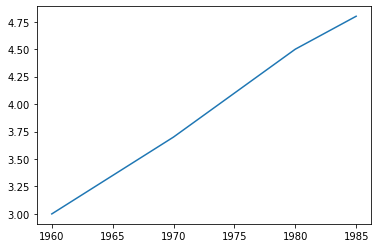

In [18]:
data = np.loadtxt('./inputs/data.txt')

X = data[:, 0] # First column
y = data[:, 1] # Second column

plt.plot(X, y); 


As mentioned in class we find the optimal line by minimising the squarred error between the predicted values and the actual values. The squarred error is defined as

$$
E = \sum_{i=1}^N (y_i-g(x_i))^2,
$$

where $g(x) = ax-b$, $x_i$, $y_i$ are the inputs and targets, and $a$ and $b$ are the model parameters. The optimum is found by setting the derivative to $0$ and solving for the parameters. In matrix form, this results in the following solution

$$
\mathbf{p}= (A^TA)^{-1}A^T\mathbf{y},
$$

where $\mathbf{p} = [\mathbf{m}, b]$ and $A = \begin{bmatrix}x_1, 1 \\ \vdots \\ x_N, 1\end{bmatrix}$.

### Task E)
1. Find a least-squares solution to the data using Numpy's `np.linalg.lstsq(A, y)` function. To create `A`, use `np.ones` and `np.stack` to stack a column of 1's onto the column of X values. Note that `np.linalg.lstsq` returns both the parameters as well as other values. See the [docs](https://numpy.org/doc/1.18/reference/generated/numpy.linalg.lstsq.html) for details.
2. Create a function `linear_model(params, X)` that takes the parameters and X as input and returns y-values as output.
3. Plot a regression line from 1950-2000 using `linear_model` and the techniques described in the Matplotlib exercise.
4. Create a function `mean_squarred_error(params, X, y)` that calculates the average error of the model. It is defined as $\frac{1}{N}E = \frac{1}{N}\sum_{i=1}^N (y_i-g(x_i))^2$.


0.0006216216216218663


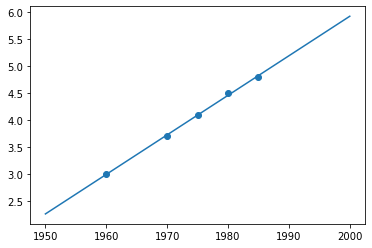

In [25]:
# Write solutions here
